Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

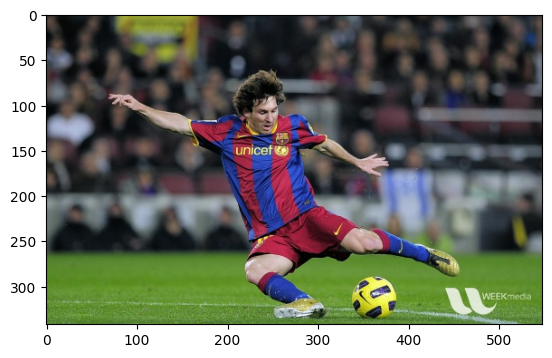

In [ ]:
img = cv.imread('messi5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

(570, 645, 3)


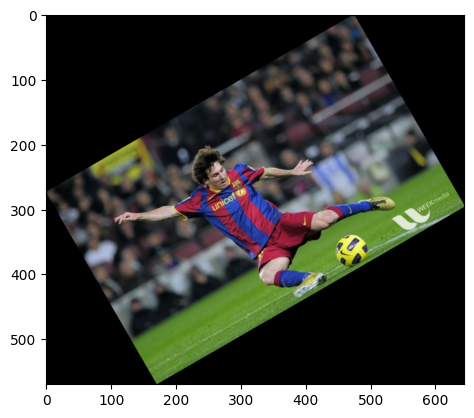

In [ ]:
from math import sin, cos, pi

angle = 30 * pi / 180

height, width = img.shape[:2]

center = (width // 2, height // 2)

alpha = cos(angle)
beta = sin(angle)

M = np.float32([
    [alpha, beta, (1-alpha)*center[0]-beta*center[1]],
    [-beta, alpha, beta * center[0] + (1-alpha) * center[1]]]
)

# Расчет новых размеров изображения после поворота
cos_theta = np.abs(M[0, 0])
sin_theta = np.abs(M[0, 1])
new_w = int((height * sin_theta) + (width * cos_theta))
new_h = int((height * cos_theta) + (width * sin_theta))

M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]


img_res = cv.warpAffine(img, M, (new_w, new_h))

plt.imshow(img_res)
print(img_res.shape)

Задание 2: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).

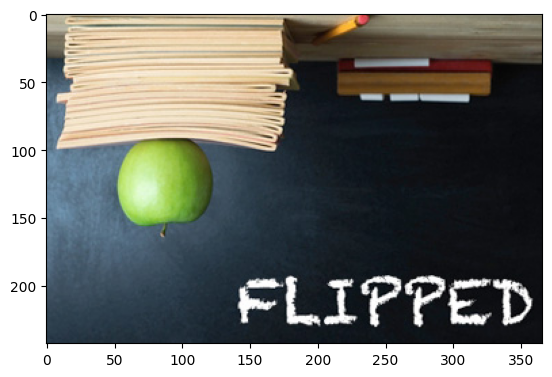

In [ ]:
img = cv.imread('apple.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

(243, 366, 3)


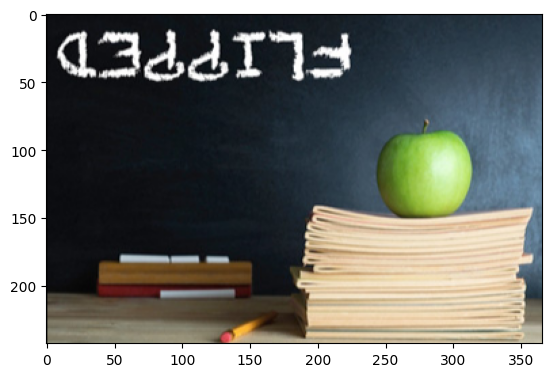

In [ ]:
angle = pi

height, width = img.shape[:2]

center = (width // 2, height // 2)

alpha = cos(angle)
beta = sin(angle)

M = np.float32([
    [alpha, beta, (1-alpha)*center[0]-beta*center[1]],
    [-beta, alpha, beta * center[0] + (1-alpha) * center[1]]]
)

# Расчет новых размеров изображения после поворота
cos_theta = np.abs(M[0, 0])
sin_theta = np.abs(M[0, 1])
new_w = int((height * sin_theta) + (width * cos_theta))
new_h = int((height * cos_theta) + (width * sin_theta))

M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]


img_res = cv.warpAffine(img, M, (new_w, new_h))

plt.imshow(img_res)
print(img_res.shape)

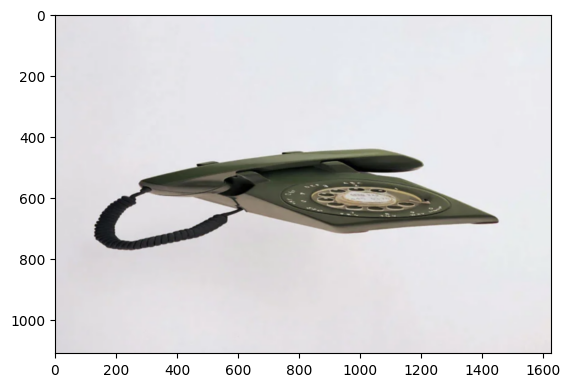

In [ ]:
img = cv.imread('phone.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

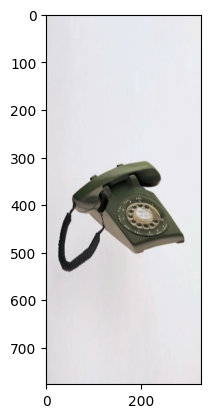

In [ ]:
img_res = cv.resize(img, dsize=None, fx=0.2, fy=0.7, interpolation=cv.INTER_CUBIC)
plt.imshow(img_res)

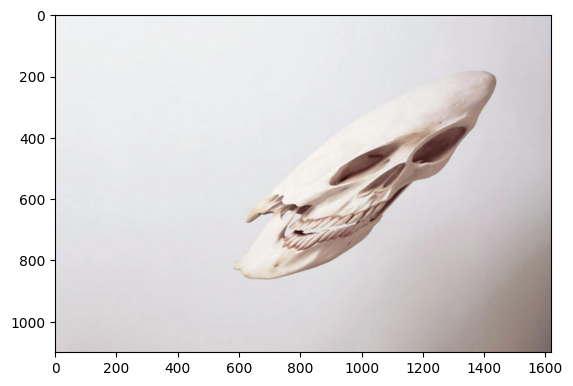

In [ ]:
img = cv.imread('skull.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

(750, 600, 3)


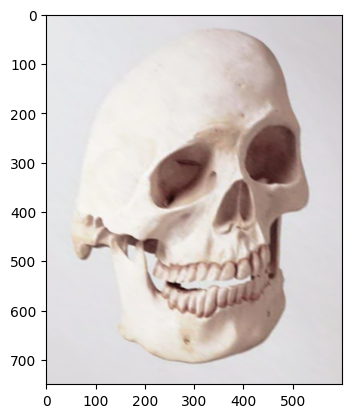

In [ ]:
height, width = img.shape[:2]

pts1 = np.float32([[450,200],[1400,200],[1100,500]])
pts2 = np.float32([[310,100],[920,200],[900,500]])
M = cv.getAffineTransform(pts1,pts2)

img_res = cv.warpAffine(img, M, (width, height), borderMode=cv.BORDER_REPLICATE)
img_res = img_res[150:900, 650:1050]
img_res = cv.resize(img_res, dsize=None, fx=1.5, fy=1, interpolation=cv.INTER_AREA)

plt.imshow(img_res)
print(img_res.shape)

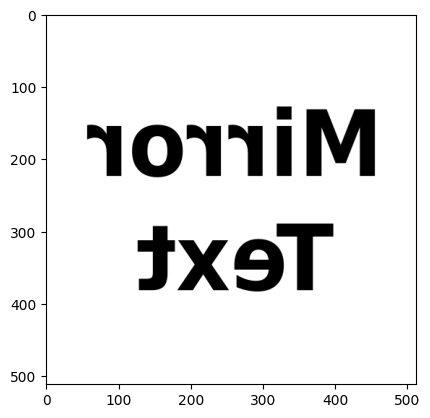

In [ ]:
img = cv.imread('text.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

(512, 512, 3)


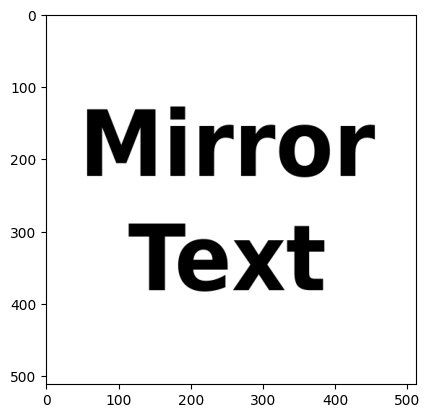

In [ ]:
height, width = img.shape[:2]
input_pts = np.float32([[0,0], [height-1,0], [0,width-1]])
output_pts = np.float32([[height-1,0], [0,0], [height-1,width-1]])

# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv.getAffineTransform(input_pts , output_pts)
img_res = cv.warpAffine(img, M, (width, height))

plt.imshow(img_res)
print(img_res.shape)